# PCA - Determinig Number of Components

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import sys
    
try:
    from utils import data_loading
except:
    sys.path.append('../utils')
    sys.path.append('../')
    from utils import data_loading

## Looping through all subj and both hemispheres seperately

In [9]:
#define empty lists to create df later on
comp_90_rh = []
comp_95_rh = []
comp_99_rh = []
comp_90_lh = []
comp_95_lh = []
comp_99_lh = []
rmse_rh = []
rmse_lh = []
subj = []

#loop thorugh each subject to perform PCA on each hemisphere separately
for subject in range(1,8+1):
    subj.append(str(subject))
    #load data
    path = '/Users/emilykruger/Documents/GitHub/aml_project_2023/data/training_split/subj0' + str(subject)
    data_lh = np.load(path + '/training_fmri/lh_train_fmri.npy')
    data_rh = np.load(path + '/training_fmri/rh_train_fmri.npy')

    #PCA_rh
    pca_rh = PCA(n_components=data_rh.shape[0])
    pca_rh.fit(data_rh)
    rh_transform = pca_rh.transform(data_rh)
    #PCA_lh
    pca_lh = PCA(n_components=data_rh.shape[0])
    pca_lh.fit(data_lh)
    lh_transform = pca_lh.transform(data_lh)

    #get the index of the first component with which me can explain 95% of variance
    ##rh
    var_rh = np.cumsum(pca_rh.explained_variance_ratio_)
    comp_90_rh.append(np.where(var_rh >= .90)[0][0])
    comp_95_rh.append(np.where(var_rh >= .95)[0][0])
    comp_99_rh.append(np.where(var_rh >= .99)[0][0])
    ##lh
    var_lh = np.cumsum(pca_lh.explained_variance_ratio_)
    comp_90_lh.append(np.where(var_lh >= .90)[0][0])
    comp_95_lh.append(np.where(var_lh >= .95)[0][0])
    comp_99_lh.append(np.where(var_lh >= .99)[0][0])

    #calculate MSE on inversed data
    ##rh
    inversed_rh = pca_rh.inverse_transform(rh_transform)
    rmse_rh.append(np.sqrt(((data_rh-inversed_rh)**2).mean()))
    ##lh
    inversed_lh = pca_lh.inverse_transform(lh_transform)
    rmse_lh.append(np.sqrt(((data_lh-inversed_lh)**2).mean()))

#store results in a df
PCA_results_separate = pd.DataFrame({'Subject': subj, '90% Component RH': comp_90_rh, '90% Component LH': comp_90_lh,
                           '95% Component RH': comp_95_rh, '95% Component LH': comp_95_lh,
                           '99% Component RH': comp_99_rh, '99% Component LH': comp_99_lh,
                           'Inverse RSME RH': rmse_rh, 'Inverse RSME LH': rmse_lh})

#print results
PCA_results_separate

,Subject,90% Component RH,90% Component LH,95% Component RH,95% Component LH,99% Component RH,99% Component LH,Inverse RSME RH,Inverse RSME LH
0,1,1060,1108,1916,1963,4019,4053,0.000014,0.000013
1,2,1002,1095,1824,1962,3895,4108,0.000014,0.000018
2,3,1219,1240,2093,2087,4187,4119,0.000015,0.000017
3,4,988,1092,1768,1880,3678,3778,0.000012,0.000012
4,5,742,704,1487,1433,3488,3377,0.000018,0.000021
5,6,998,1098,1858,1919,3964,3917,0.000016,0.000017
6,7,978,918,1794,1668,3859,3589,0.000013,0.000015
7,8,946,960,1747,1713,3770,3611,0.000012,0.000011


In [10]:
print(f'Number of Components for 90%: {max(comp_90_rh + comp_90_lh)}\n',
    f'Number of Components for 95%: {max(comp_95_rh + comp_95_lh)}\n',
    f'Number of Components for 99%: {max(comp_99_rh + comp_99_lh)}')

Number of Components for 90%: 1240
 Number of Components for 95%: 2093
 Number of Components for 99%: 4187


### Looping through all subj and both hemispheres combined

In [11]:
#define empty lists to create df later on
comp_90 = []
comp_95 = []
comp_99 = []
rmse = []
subj = []

#loop thorugh each subject to perform PCA on  on both hemipsheres combined
for subject in range(1,8+1):
    subj.append(str(subject))
    #load data
    path = '/Users/emilykruger/Documents/GitHub/aml_project_2023/data/training_split/subj0' + str(subject)
    data_lh = np.load(path + '/training_fmri/lh_train_fmri.npy')
    data_rh = np.load(path + '/training_fmri/rh_train_fmri.npy')
    #concat both hemispheres
    brain = np.concatenate((data_lh, data_rh), axis = 1)

    #PCA
    pca_brain = PCA(n_components=brain.shape[0])
    pca_brain.fit(brain)
    brain_transform = pca_brain.transform(brain)

    #get the index of the first component with which me can explain 95% of variance
    var_brain = np.cumsum(pca_brain.explained_variance_ratio_)
    comp_90.append(np.where(var_brain >= .90)[0][0])
    comp_95.append(np.where(var_brain >= .95)[0][0])
    comp_99.append(np.where(var_brain >= .99)[0][0])

    #calculate MSE on inversed data
    inversed_brain = pca_brain.inverse_transform(brain_transform)
    rmse.append(np.sqrt(((brain-inversed_brain)**2).mean()))

#store results in a df
PCA_results_combined = pd.DataFrame({'Subject': subj, '90% Component': comp_90,'95% Component': comp_95,
                           '99% Component': comp_99,'Inverse RSME': rmse})

#print results
PCA_results_combined

,Subject,90% Component,95% Component,99% Component,Inverse RSME
0,1,1669,2928,5679,0.000014
1,2,1614,2855,5613,0.000015
2,3,1818,3029,5581,0.000014
3,4,1544,2662,5108,0.000013
4,5,1133,2246,4966,0.000022
5,6,1553,2738,5338,0.000016
6,7,1480,2652,5347,0.000013
7,8,1391,2480,4971,0.000013


In [12]:
print(f'Number of Components for 90%: {max(comp_90)}\n',
    f'Number of Components for 95%: {max(comp_95)}\n',
    f'Number of Components for 99%: {max(comp_99)}')

Number of Components for 90%: 1818
 Number of Components for 95%: 3029
 Number of Components for 99%: 5679


    The necessary number of components for a combined brain is lower that that for two separate hemisphere - so there must be some dependencies (makes sense, since the  hemispheres are connected). So we save on computational costs if we predict the full brain. 
    
    Since brain data might contain lots of noise that in captured in these 90+% variance, we additionally check the elbow method

# Window method for all subj and both hemispheres combined

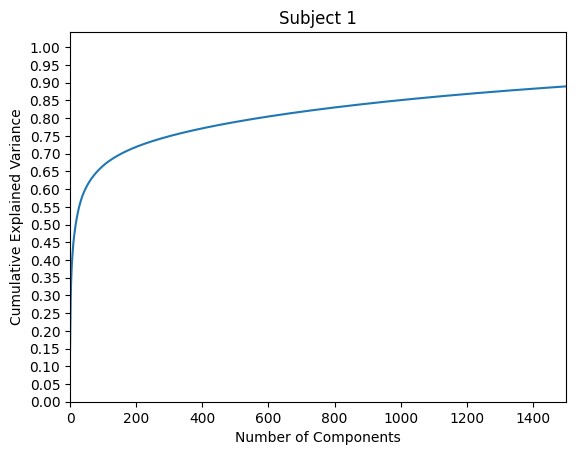

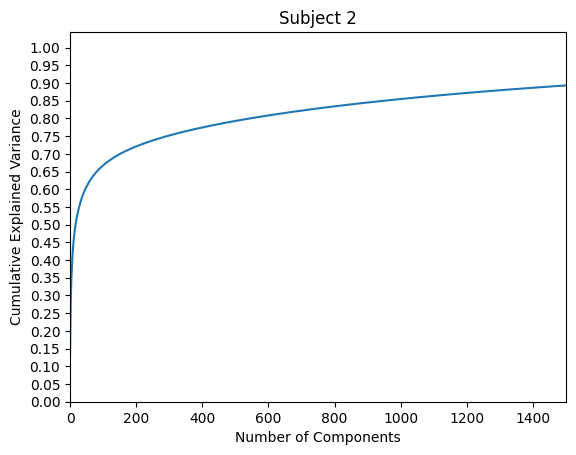

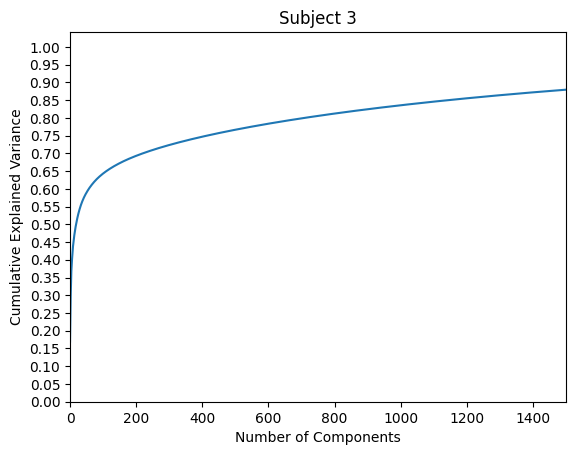

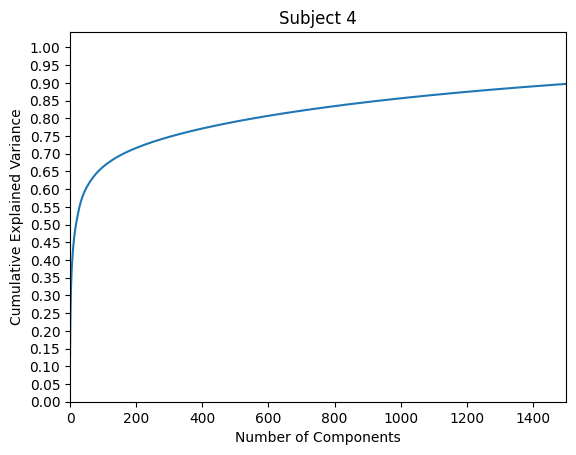

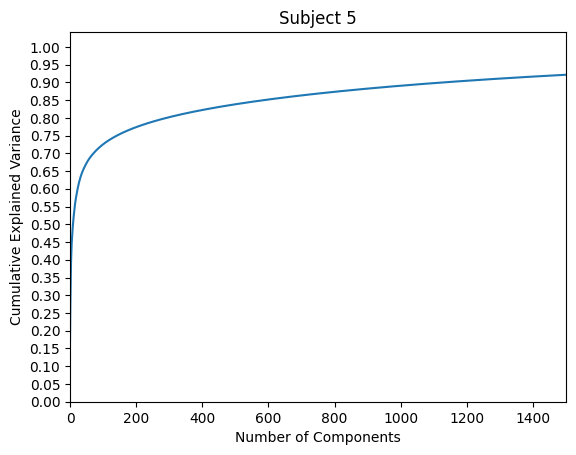

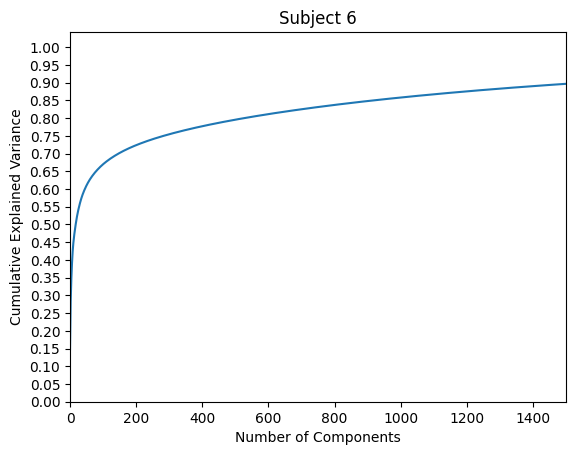

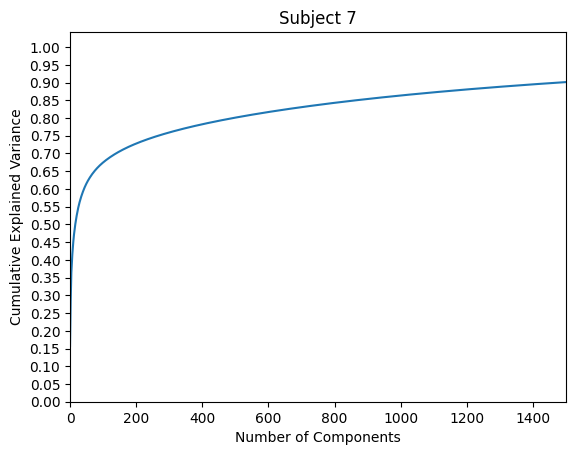

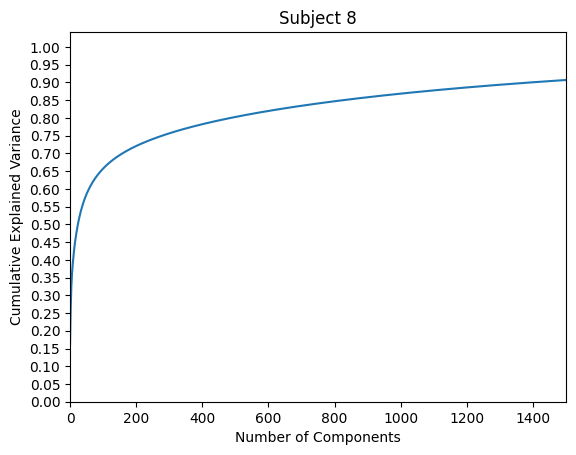

In [3]:
variance = {}

#loop thorugh each subject to perform PCA on both hemipsheres combined
for subject in range(1,8+1):
    sub = f'subject {subject}'
    #load data
    path = '/Users/emilykruger/Documents/GitHub/aml_project_2023/data/training_split/subj0' + str(subject)
    data_lh = np.load(path + '/training_fmri/lh_train_fmri.npy')
    data_rh = np.load(path + '/training_fmri/rh_train_fmri.npy')
    #concat both hemispheres
    brain = np.concatenate((data_lh, data_rh), axis = 1)

    #PCA
    pca_brain = PCA(n_components=brain.shape[0])
    pca_brain.fit(brain)
    brain_transform = pca_brain.transform(brain)

    variance[sub] = np.cumsum(pca_brain.explained_variance_ratio_)
    #plot but  explained variance ratio zoomed in on num_components 0-1500
    plt.plot(np.cumsum(pca_brain.explained_variance_ratio_))
    plt.xlabel('Number of Components')
    plt.xlim(0, 1500)
    plt.ylabel('Cumulative Explained Variance')
    plt.yticks(np.arange(0, 1.05, 0.05))
    plt.title(f'Subject {subject}')
    plt.show()

    Looks like the elbow is at 100 components for all subjects.

## Checking How Much Variance We Explain With the Chosen Number of Components

In [5]:
comp = []
for sub, var in variance.items():
    print(f'{sub}: Cumulative Explained Variance of 100 Components: {var[99]}\n', '-'*10, '\n')
    comp.append(var[99])

print(f'Minimum: {min(comp)}\nMaximum:{max(comp)}\nAverage:{np.mean(comp)}')

subject 1: Cumulative Explained Variance of 100 Components: 0.6651061773300171
 ---------- 

subject 2: Cumulative Explained Variance of 100 Components: 0.6665521860122681
 ---------- 

subject 3: Cumulative Explained Variance of 100 Components: 0.6423294544219971
 ---------- 

subject 4: Cumulative Explained Variance of 100 Components: 0.6624000072479248
 ---------- 

subject 5: Cumulative Explained Variance of 100 Components: 0.7245782613754272
 ---------- 

subject 6: Cumulative Explained Variance of 100 Components: 0.6691060662269592
 ---------- 

subject 7: Cumulative Explained Variance of 100 Components: 0.6738496422767639
 ---------- 

subject 8: Cumulative Explained Variance of 100 Components: 0.6562608480453491
 ---------- 

Minimum: 0.6423294544219971
Maximum:0.7245782613754272
Average:0.6700228452682495
